<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/Champagne2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade --no-deps statsmodels
!pip install tbats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 849.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.6 MB/s eta 0:00:00


--2023-05-03 21:48:43--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly_champagne_sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1596 (1.6K) [text/plain]
Saving to: ‘monthly_champagne_sales.csv.1’

monthly_champagne_s 100%[===================>]   1.56K  --.-KB/s    in 0s      

2023-05-03 21:48:43 (23.7 MB/s) - ‘monthly_champagne_sales.csv.1’ saved [1596/1596]



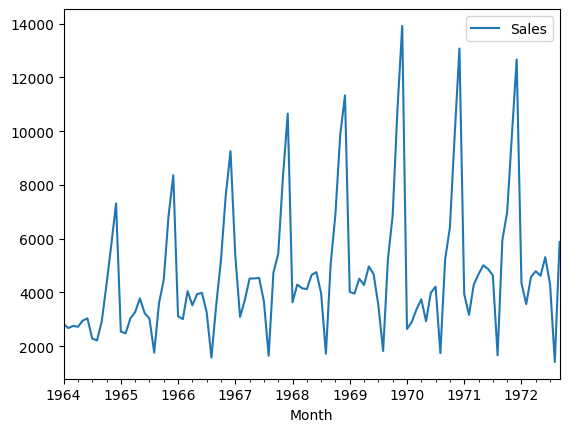

In [26]:
# load and plot the car sales dataset
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly_champagne_sales.csv
from pandas import read_csv
from matplotlib import pyplot
# load data
df = read_csv('monthly_champagne_sales.csv', index_col='Month', parse_dates=True)
# plot the time series
df.plot()
pyplot.show()

In [3]:
print(df.shape)
df

(105, 1)


,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


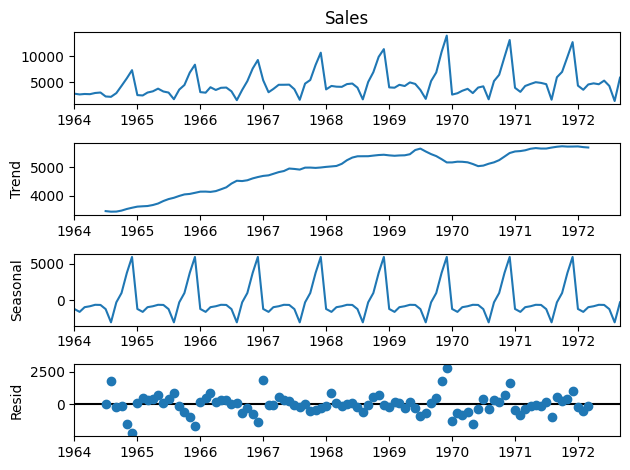

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(df['Sales'],model='additive')
decompose_result.plot();

Challenge: Use last 47 months of data as test and get RMSE value less than 924.699 found in analysis having URL below.
https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne/

In [29]:
train = df[:-12]
test = df[-12:]
print("Full data shape is "+ str(df.shape))
print("Train data shape is "+ str(train.shape))
print("Test data shape is "+ str(test.shape))

Full data shape is (105, 1)
Train data shape is (93, 1)
Test data shape is (12, 1)


## **HOLT WINTERS**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

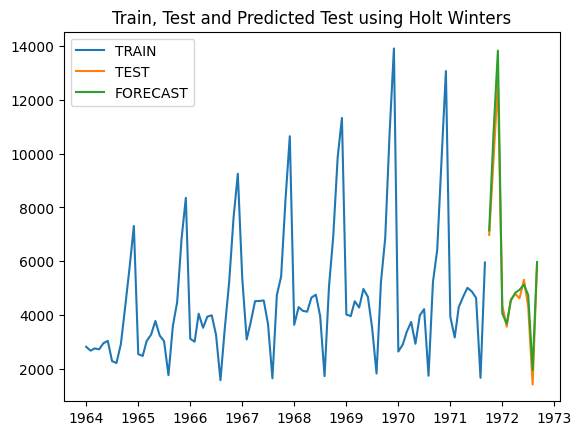

In [8]:
import pandas as pd
import numpy as np
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='mul',seasonal_periods=12).fit()
test_predictions = ExponentialSmoothing(train,trend='add',seasonal='mul',seasonal_periods=12).fit().forecast(12)
plt.plot(train,label='TRAIN')
plt.plot(test,label='TEST')
plt.plot(test_predictions,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using Holt Winters')

In [9]:
#Evaluate forecasting Performance
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_predictions)}')
mse=mean_squared_error(test,test_predictions)
rmse=np.sqrt(mse)
print(f'Mean Squared Error = {mse}')
print(f'Root Mean Squared Error = {rmse}')
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_predictions) )}')

Mean Absolute Error = 365.5509891560373
Mean Squared Error = 258372.2338228605
Root Mean Squared Error = 508.3032892111367
Mean Absolute Percentage Error = 7.783657566790893


## **TBATS**

In [10]:
from tbats import TBATS
import numpy as np
estimator = TBATS(
    seasonal_periods=[12],
    use_arma_errors=True,  # shall try only models with ARMA
    use_box_cox=True # will use Box-Cox
)
model = estimator.fit(train)

Mean Absolute Error = 327.2134011952076
Mean Squared Error = 151139.93582011477
Root Mean Squared Error = 388.76720003122017
Mean Absolute Percentage Error = 9.129549085179118


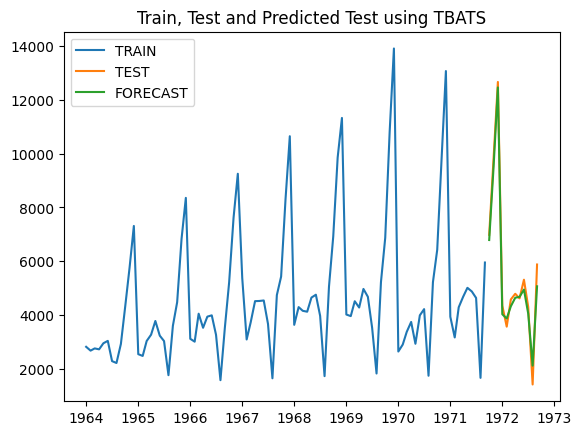

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
test_predictions = model.forecast(steps=12)
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_predictions)}')
mse=mean_squared_error(test,test_predictions)
rmse=np.sqrt(mse)
print(f'Mean Squared Error = {mse}')
print(f'Root Mean Squared Error = {rmse}')
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_predictions) )}')

#916.14727451
test_predictions=pd.DataFrame(test_predictions)
new_index = test.index
test_predictions=test_predictions.set_index(new_index)
test_predictions.columns=['SALES']
plt.plot(train,label='TRAIN')
plt.plot(test,label='TEST')
plt.plot(test_predictions,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using TBATS');

# **ETS**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Absolute Error = 321.57918805287454
Mean Squared Error = 132636.19546635292
Root Mean Squared Error = 364.1925252752353
Mean Absolute Percentage Error = 7.271490682036578


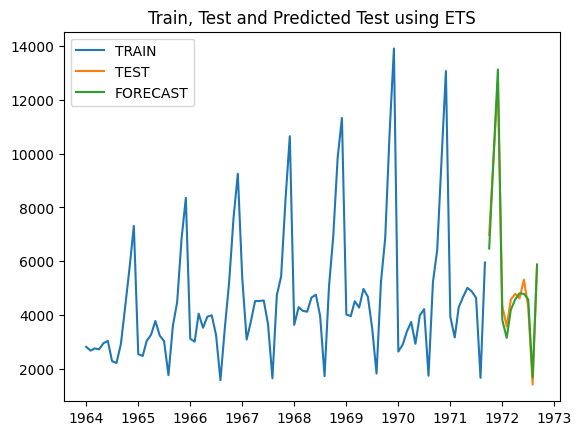

In [19]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_absolute_error,mean_squared_error
test_predictions=ETSModel(train,error='add', trend='mul',seasonal='add',damped_trend=True, seasonal_periods=12).fit().forecast(12)
print(f'Mean Absolute Error = {mean_absolute_error(test,test_predictions)}')
mse=mean_squared_error(test,test_predictions)
rmse=np.sqrt(mse)
print(f'Mean Squared Error = {mse}')
print(f'Root Mean Squared Error = {rmse}')
import numpy as np
def mape(actual,pred):
            return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_predictions) )}')
test_predictions=pd.DataFrame(test_predictions)
new_index = test.index
test_predictions=test_predictions.set_index(new_index)
test_predictions.columns=['SALES']
plt.plot(train,label='TRAIN')
plt.plot(test,label='TEST')
plt.plot(test_predictions,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using ETS');

In [ ]:
!pip install statsforecast

AUTOETS

In [46]:
df['unique_id']='M1'
df['ds']=df.index
train = df[:-12]
test = df[-12:]
print("Full data shape is "+ str(df.shape))
print("Train data shape is "+ str(train.shape))
print("Test data shape is "+ str(test.shape))

Full data shape is (105, 3)
Train data shape is (93, 3)
Test data shape is (12, 3)


In [51]:
test

,Month,Sales,unique_id,ds
0,1971-10-01,6981,M1,1971-10-01
1,1971-11-01,9851,M1,1971-11-01
2,1971-12-01,12670,M1,1971-12-01
3,1972-01-01,4348,M1,1972-01-01
4,1972-02-01,3564,M1,1972-02-01
5,1972-03-01,4577,M1,1972-03-01
6,1972-04-01,4788,M1,1972-04-01
7,1972-05-01,4618,M1,1972-05-01
8,1972-06-01,5312,M1,1972-06-01
9,1972-07-01,4298,M1,1972-07-01


In [52]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA,AutoETS

sf = StatsForecast(
    models = [AutoETS(season_length = 12),AutoARIMA(season_length = 12)],
    freq = 'M'
)

sf.fit(train)
pred=sf.predict(h=12)

In [53]:
sf.plot(pred)

In [54]:
test

,Month,Sales,unique_id,ds
0,1971-10-01,6981,M1,1971-10-01
1,1971-11-01,9851,M1,1971-11-01
2,1971-12-01,12670,M1,1971-12-01
3,1972-01-01,4348,M1,1972-01-01
4,1972-02-01,3564,M1,1972-02-01
5,1972-03-01,4577,M1,1972-03-01
6,1972-04-01,4788,M1,1972-04-01
7,1972-05-01,4618,M1,1972-05-01
8,1972-06-01,5312,M1,1972-06-01
9,1972-07-01,4298,M1,1972-07-01


In [56]:
pred.reset_index(inplace=True)
pred

,unique_id,ds,AutoETS,AutoARIMA
0,M1,1971-09-30,6991.583496,6799.743652
1,M1,1971-10-31,10442.451172,10265.916016
2,M1,1971-11-30,13053.616211,13579.343750
3,M1,1971-12-31,4382.043945,3474.833252
4,M1,1972-01-31,4029.233643,3041.989990
5,M1,1972-02-29,4701.621582,3959.461670
6,M1,1972-03-31,4907.767090,4384.833008
7,M1,1972-04-30,5154.670898,4300.087402
8,M1,1972-05-31,5237.774414,4597.188477
9,M1,1972-06-30,4552.121582,4612.108887


In [57]:
pred['Sales']=test['Sales'].values
pred

,unique_id,ds,AutoETS,AutoARIMA,Sales
0,M1,1971-09-30,6991.583496,6799.743652,6981
1,M1,1971-10-31,10442.451172,10265.916016,9851
2,M1,1971-11-30,13053.616211,13579.343750,12670
3,M1,1971-12-31,4382.043945,3474.833252,4348
4,M1,1972-01-31,4029.233643,3041.989990,3564
5,M1,1972-02-29,4701.621582,3959.461670,4577
6,M1,1972-03-31,4907.767090,4384.833008,4788
7,M1,1972-04-30,5154.670898,4300.087402,4618
8,M1,1972-05-31,5237.774414,4597.188477,5312
9,M1,1972-06-30,4552.121582,4612.108887,4298


In [62]:
import numpy as np
def mae(y_hat, y_true):
    return np.mean(np.abs(y_hat-y_true))
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

y_true = pred['Sales'].values
ets_preds = pred['AutoETS'].values
arima_preds = pred['AutoARIMA'].values

print('AutoETS   MAE: %0.3f' % mae(ets_preds, y_true))
print('AutoETS   MAPE: %0.3f' % MAPE(ets_preds, y_true))
print('-----------------------------')
print('ARIMA MAE: %0.3f' % mae(arima_preds, y_true))
print('ARIMA MAPE: %0.3f' % MAPE(arima_preds, y_true))

AutoETS   MAE: 292.065
AutoETS   MAPE: 6.814
-----------------------------
ARIMA MAE: 469.753
ARIMA MAPE: 10.625
